In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
from matplotlib import pyplot as plt
import os

In [35]:
# color palette fors plotting
colors6 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449']
colors7 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8']
colors8 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64']
colors9 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701']
colors10 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE']
colors11 = ['#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors12 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors16 = ['#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors17 = ['#7DDCAC', '#808000', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']

# 8 different color palettes with different amount of colors in it
colors = [colors6, colors7, colors8, colors9, colors10, colors11, colors12, colors13, colors14, colors15, colors16, colors17, colors18]
#sns.set_palette(sns.color_palette(colors18))


# new colors from color brewer (12):
colors_new = ['#8dd3c7', '#BD11A1', '#bebada', '#097E02','#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#b15928', '#6a3d9a', '#38E1F5','#1f78b4','#ff7f00', '#484848', '#ffed6f']
colors_mettalic = ['#4682bf', '#eda6c4', '#aa4069', '#ffe898','#838996', '#c3def3','#cd9575', '#c9ffe5', '#5fa777', '#001440', '#722f37', '#e18e96', '#8e88ce', '#ec5297', '#1b4d3e', '#da680f', '#3399ff', '#d9b611']
sns.set_palette(sns.color_palette(colors_new))

In [22]:
# data, neighbors: how many next neighbors: int, name: how to call the resulting file: String, sav_path: output directory: string, roi_labels_df: DataFrame
def analysis_embedding_clustering(data, neighbors, metric, name, sav_path, cluster_selection_method, roi_labels_df):
    
    # UMAP embedding
    embedding = umap.UMAP(
        n_neighbors=neighbors,
        n_components=2,
        min_dist=0.0, # best for clustering
        metric=metric
    ).fit_transform(data)
    
    # save umap results as dataframe
    embedding_df = pd.DataFrame(embedding)
    # set name for saving
    name_umap = 'UMAP_' + name
    # save umap result
    np.save(os.path.join(sav_path, name_umap), embedding)

    # plot the embedding 
    %matplotlib notebook
    plt.scatter(embedding[:, 0], embedding[:, 1], s=0.1, cmap='Spectral');
    plt.title('UMAP Projection', fontsize=18);
    # save plot
    plt.savefig(os.path.join(sav_path, 'Plots', name_umap))
    
    
    # HDBScan
    labels = hdbscan.HDBSCAN(
        min_samples=5,
        min_cluster_size=200,
        cluster_selection_method=cluster_selection_method
    ).fit_predict(embedding)
    
    num_labels = np.amax(labels)+1
    
        
    clustered = (labels >= 0)
    
    labels_df = pd.DataFrame(labels)
    
    # concatenation of umap results and roi labels
    UMAP_roi_df = pd.concat([embedding_df, roi_labels_df], axis=1)
    # renaming
    UMAP_roi_df.columns = ['x', 'y', 'ROI']
    # saving dataframe
    name_sav_umap_roi = 'UMAP_ROI_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_roi))
    
    # concatenation of umap results and hdbscan labels
    UMAP_hdbscan_labels_df = pd.concat([embedding_df, labels_df], axis =1)
    # renaming 
    UMAP_hdbscan_labels_df.columns = ['x', 'y', 'class']
    # saving dataframe
    name_sav_umap_hdbscan = 'UMAP_HDBScan_' + name
    UMAP_roi_df.to_pickle(os.path.join(sav_path, name_sav_umap_hdbscan))
    
    # UMAP results with HDBScan label & ROI label
    UMAP_hdbscan_roi = pd.concat([UMAP_hdbscan_labels_df, roi_labels_df], axis=1)
    UMAP_hdbscan_roi.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
    name_sav_all = 'UMAP_HDBScan_ROI_' + name
    UMAP_hdbscan_roi.to_pickle(os.path.join(sav_path, name_sav_all))
    
    percent_clustered = (np.sum(clustered) / embedding.shape[0])*100
    print(percent_clustered, '% of the data points were clustered')
    print('The HDBScan clustering yielded ', num_labels, ' classes')
    
    return num_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi


In [23]:
fc_matrix = np.load('/Users/jenniferthem/Masterthesis_Data/FC_matrix.npy')
roi_labels_df = pd.read_pickle('/Users/jenniferthem/Masterthesis_Data/roi_labels.pkl') # dataframe

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


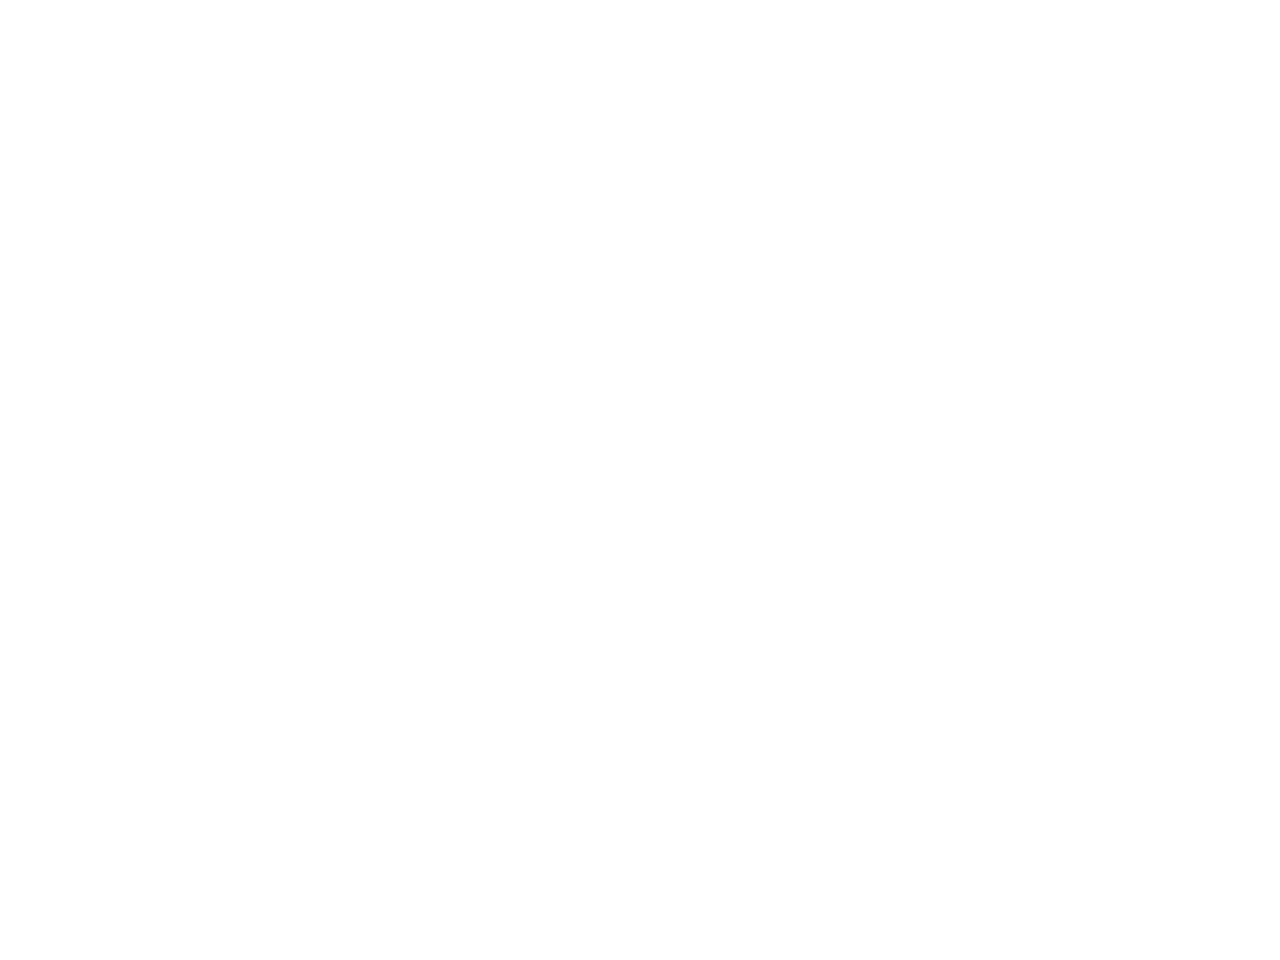

58.338243959929294 % of the data points were clustered
The HDBScan clustering yielded  14  classes


(14,               x         y  class
 0     -0.592849  1.433918     -1
 1     -0.451836  1.420404     -1
 2     -0.784166  2.163019     -1
 3     -0.860664  1.713532     -1
 4     -0.848262  1.804344     11
 ...         ...       ...    ...
 11874  7.372825  0.770855      3
 11875  7.385976  0.801091      3
 11876  7.393325  0.773173      3
 11877  7.377400  0.766682      3
 11878  7.355983  0.739763      3
 
 [11879 rows x 3 columns],               x         y      ROI
 0     -0.592849  1.433918     OFC1
 1     -0.451836  1.420404     OFC1
 2     -0.784166  2.163019     OFC1
 3     -0.860664  1.713532     OFC1
 4     -0.848262  1.804344     OFC1
 ...         ...       ...      ...
 11874  7.372825  0.770855  Caudate
 11875  7.385976  0.801091  Caudate
 11876  7.393325  0.773173  Caudate
 11877  7.377400  0.766682  Caudate
 11878  7.355983  0.739763  Caudate
 
 [11879 rows x 3 columns], array([False, False, False, ...,  True,  True,  True]),               x         y  HDBScanLabel    

In [24]:
analysis_embedding_clustering(fc_matrix, 10, 'euclidean', 'Euclidean', '/Users/jenniferthem/Masterthesis_Data', 'leaf', roi_labels_df)

## Plots

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


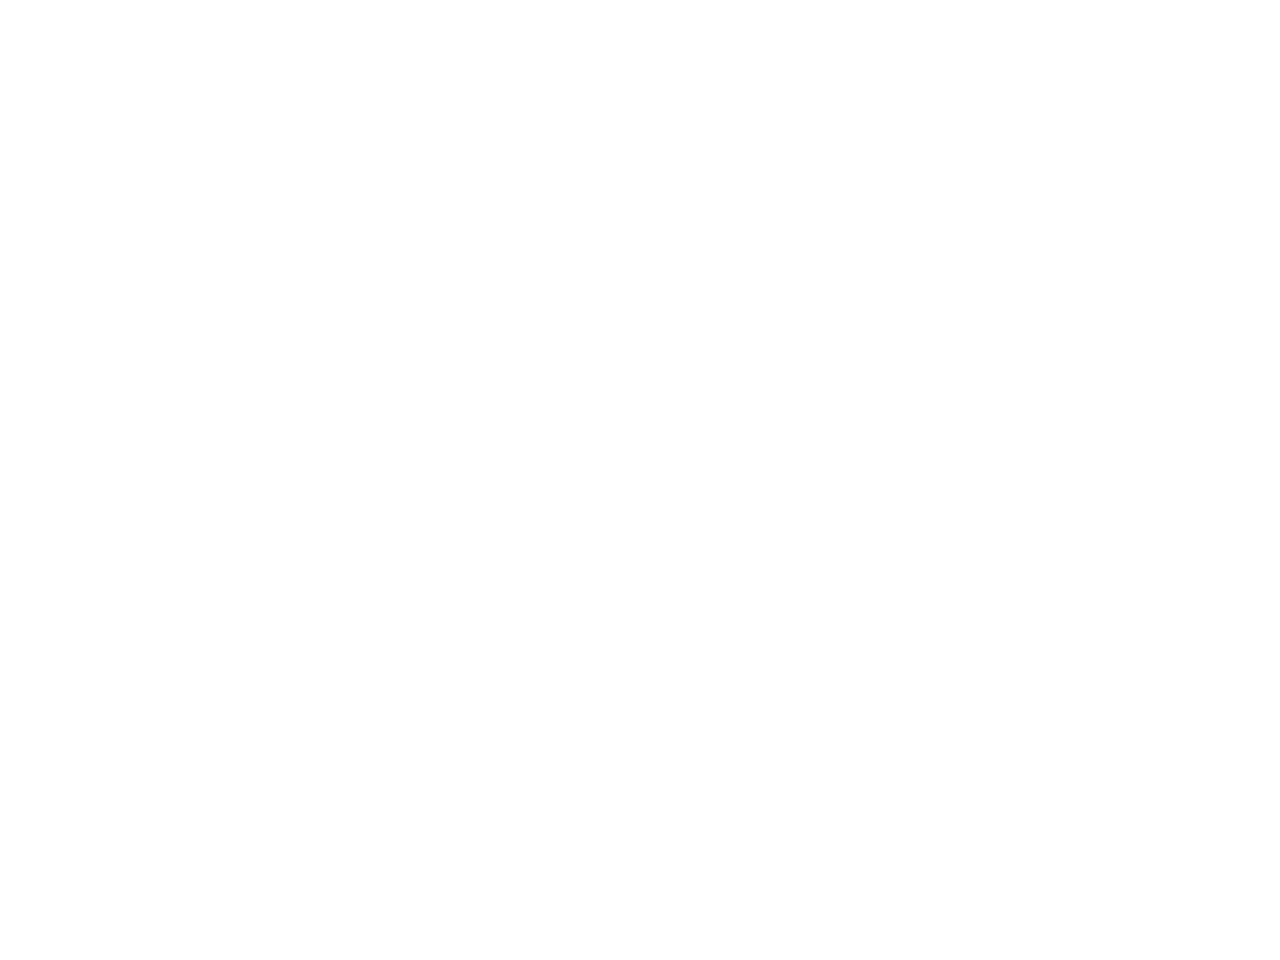

55.737014900244134 % of the data points were clustered
The HDBScan clustering yielded  12  classes


In [6]:
[n_labels, UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, UMAP_hdbscan_roi] = analysis_embedding_clustering(fc_matrix, 50, 'euclidean', 'Euclidean', '/Users/jenniferthem/Masterthesis_Data', 'leaf', roi_labels_df)

In [13]:
n_labels

13

#### HDBScan Plot

In [7]:
# data has to have form of x, y, class DataFrame, clustered: np array
def plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    %matplotlib notebook
    plot = sns.scatterplot(x="x", y="y", hue='class', data=UMAP_hdbscan_labels_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    hdbscan_plot = 'hdbscan_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', hdbscan_plot))
    

<IPython.core.display.Javascript object>


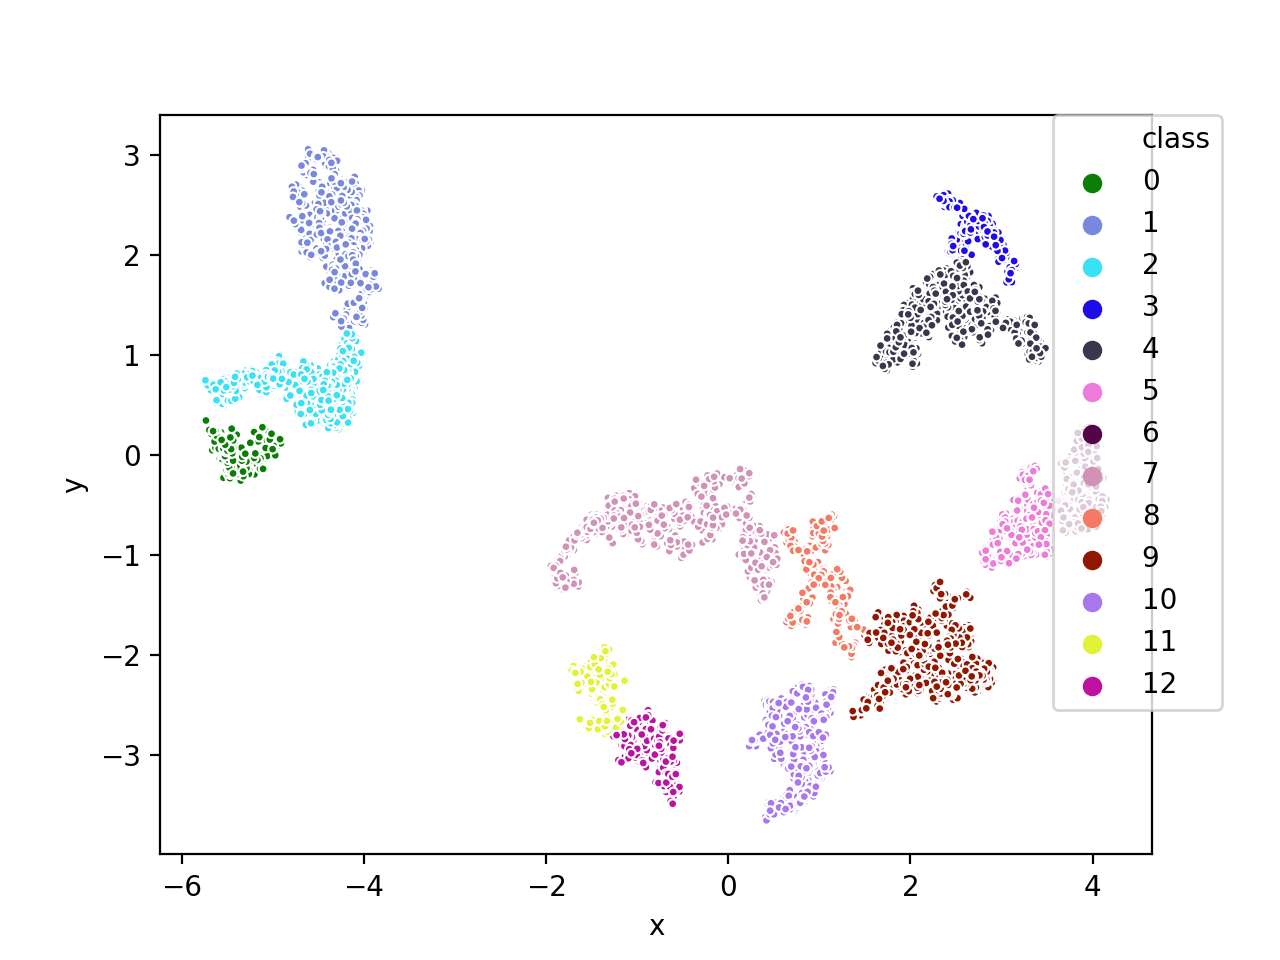

In [52]:
plotting_hdbscan(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors13, '/Users/jenniferthem/Masterthesis_Data', 'Euclidean')

In [25]:
def plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, color_palette, sav_path, name):
    
    
    %matplotlib notebook
    sp = sns.scatterplot(x="x", y="y", hue='ROI', data=UMAP_roi_df[clustered], palette = color_palette, legend = 'full', s=10)
    plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
    roi_plot = 'hdbscan_roi_plot_' +  name
    plt.savefig(os.path.join(sav_path, 'Plots', roi_plot))

<IPython.core.display.Javascript object>


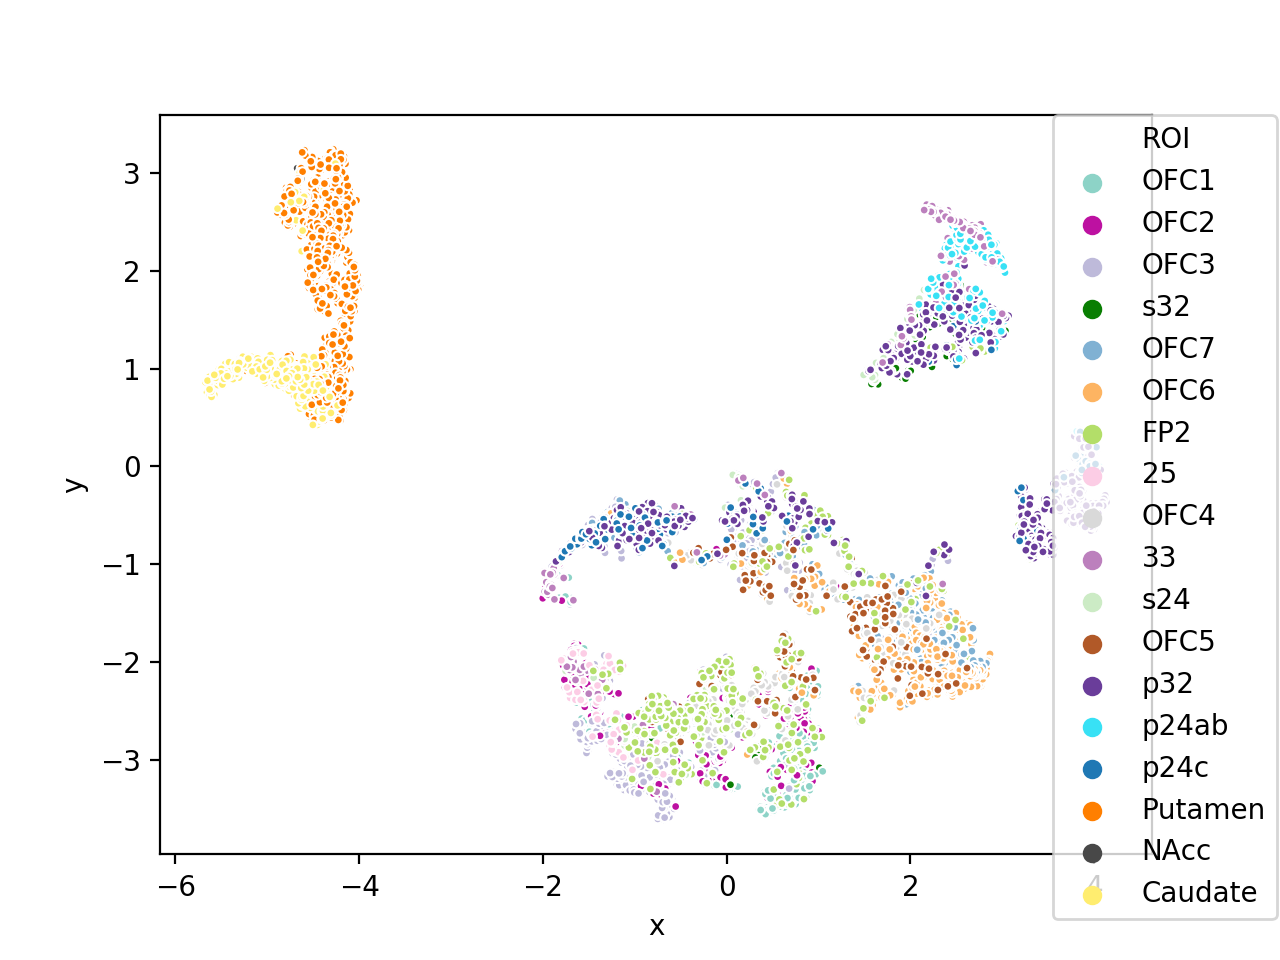

In [31]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors_new, '/Users/jenniferthem/Masterthesis_Data', 'Euclidean')

<IPython.core.display.Javascript object>


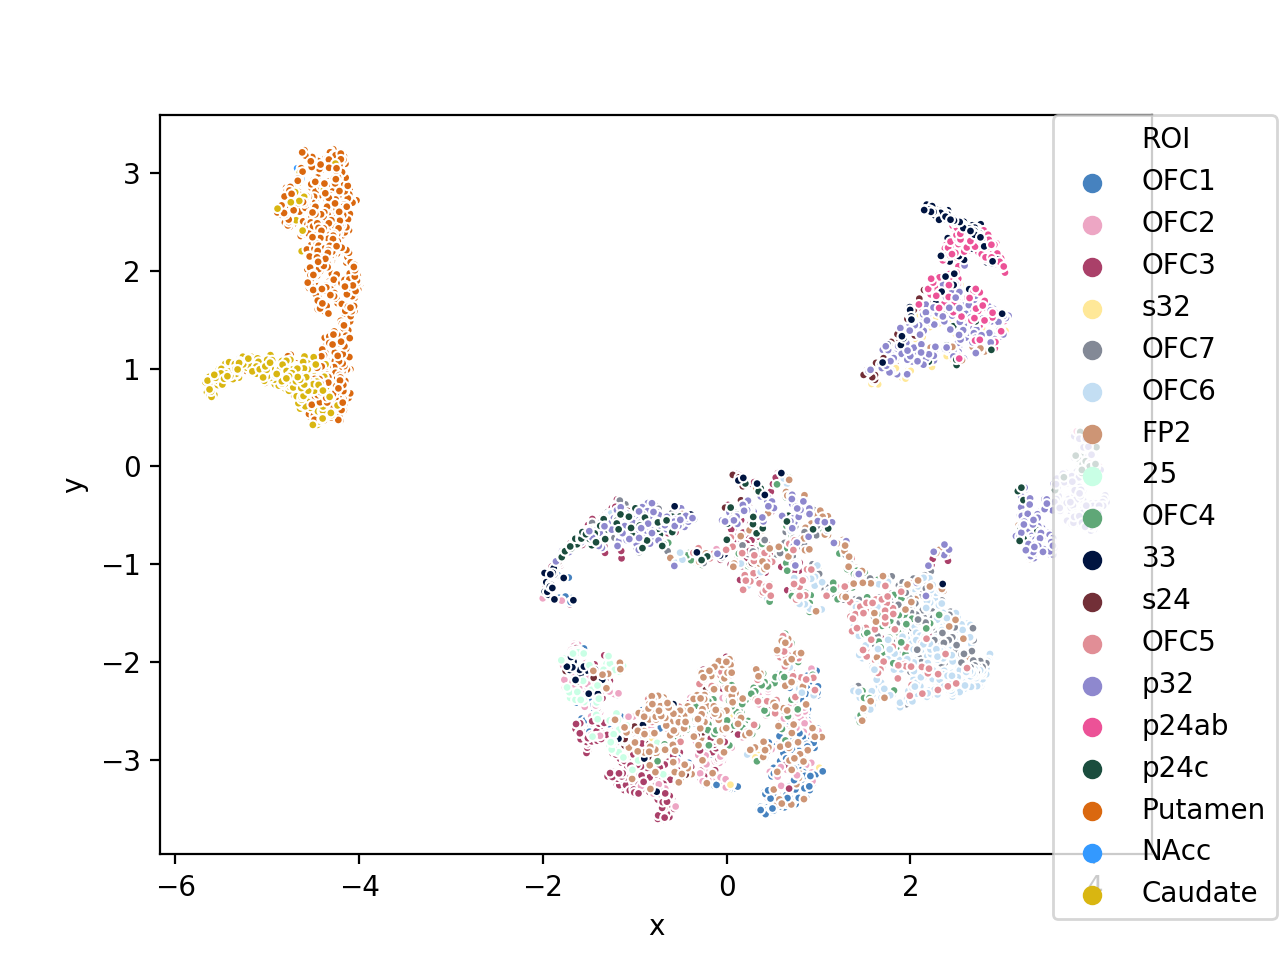

In [36]:
plotting_rois(UMAP_hdbscan_labels_df, UMAP_roi_df, clustered, colors_mettalic, '/Users/jenniferthem/Masterthesis_Data', 'Euclidean')

In [26]:
UMAP_hdbscan_roi

,x,y,HDBScanLabel,ROI
0,-4.675502,0.512921,1,OFC1
1,0.535345,-2.486451,10,OFC1
2,-4.617513,0.691200,1,OFC1
3,0.911699,-2.331439,-1,OFC1
4,-5.055741,0.595127,1,OFC1
...,...,...,...,...
11874,-6.319488,0.689924,1,Caudate
11875,-6.361935,0.723128,1,Caudate
11876,-6.377461,0.742851,1,Caudate
11877,-6.353093,0.713760,1,Caudate


### Cluster ROI count

DataFrame that contains a count for the number of ROIs in each cluster

In [ ]:
keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']


In [71]:
# input: df containing x & y from UMAP, HDBScanlabel & ROI label, n_class: number of classes from hdbscan, keys: list of ROIs
# keys = ['OFC1', 'OFC2', 'OFC3', 'OFC4', 'OFC5', 'OFC6', 'OFC7', 's32', 'FP2', '25', 's24', '33', 'p32', 'p24ab', 'p24c', 'Putamen', 'NAcc', 'Caudate']
# name_hhdbscan: 'HDBScanLabel' - String
def create_cluster_roi_df(clu_roi_df, n_class, keys, name_hdbscan, path):
    count = 0
    clu_list = []
    # while loop to create a list of clusters
    while count < np.amax(n_class):
        # list of clusters
        # 'HDBSCanLabel can be replaced with name_hdbscan'
        
        clu_list.append(clu_roi_df.loc[clu_roi_df['HDBScanLabel']==count])
        count = count+1
        
    
    clu_list
    # initializing dic
    clu_roi_dic = {}    
    count_clu = 0
    
    # loop through all clusters
    while(count_clu < np.amax(n_class)):
        # name of the cluster
        str_count = 'Cluster_' + str(count_clu)
        # initializing nested dic
        clu_roi_dic[str_count] = {}
        # index for the list of clusters
        clu_it = 0
        for entry in keys:
            clu = clu_list[count_clu]    
            # filling nested dictionary
            clu_roi_dic[str_count][entry] = (clu.ROI.values == entry).sum()
            
            
        count_clu = count_clu+1
        
        clu_roi_df = pd.DataFrame.from_dict(clu_roi_dic, orient='index')
        
        
        clu_roi_df.to_pickle(os.path.join(path, 'cluster_roi_df'))

    return clu_roi_df


In [72]:
clu_roi_dic = create_cluster_roi_df(UMAP_hdbscan_roi, n_labels, keys, 'HDBScanLabel', '/Users/jenniferthem/Masterthesis_Data')

In [73]:
clu_roi_dic

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
Cluster_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,966,111,27
Cluster_1,6,6,15,0,0,0,2,0,0,0,0,4,3,0,2,565,7,511
Cluster_2,0,0,2,0,0,0,0,119,32,0,33,0,19,0,0,0,0,0
Cluster_3,0,0,0,0,0,0,0,144,3,0,52,12,213,63,21,0,0,0
Cluster_4,0,0,0,0,0,0,0,0,0,0,2,205,1,133,0,0,0,0
Cluster_5,0,0,16,68,57,392,204,0,25,0,0,2,3,0,0,0,0,0
Cluster_6,0,0,0,0,0,0,0,0,3,0,0,0,212,9,61,0,0,0
Cluster_7,0,0,0,0,0,0,0,0,27,0,0,0,183,0,15,0,0,0
Cluster_8,13,20,135,12,2,2,38,0,5,2,11,40,143,0,83,0,0,0
Cluster_9,84,101,98,0,2,0,0,1,11,51,10,19,0,0,0,0,0,0


Number of processors:  4
